# Importar librerías

In [74]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Opcional: ver todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Guardado y carga de modelos
import joblib

# División de datos y validación
from sklearn.model_selection import train_test_split

# Modelos de regresión:
# Regresión lineal básica
from sklearn.linear_model import LinearRegression

# Regresiones con regularización
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Modelo no lineal y flexible
from sklearn.ensemble import RandomForestRegressor

# Transformaciones y generación de características
from sklearn.preprocessing import PolynomialFeatures

# Métricas de evaluación
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Carga de datos

In [75]:
# Cargamos datos y leemos las primeras 5 filas
df= pd.read_csv('../data/processed/df_regresion.csv', sep=';')
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,nota_final,aprobado,horario_desconocido,horario_mañana,horario_noche,horario_tarde,estilo_auditivo,estilo_desconocido,estilo_kinestésico,estilo_lectura/escritura,estilo_visual
0,0.331667,0.269000,0.833000,0.446667,0.636364,0.0,1.0,84.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.418333,0.726143,0.793125,0.103333,0.000000,1.0,0.0,72.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.146250,0.862571,0.682750,0.626667,0.636364,0.0,0.0,80.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235417,0.741143,0.785625,0.765000,0.454545,0.0,0.0,78.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.517857,0.431750,0.445000,0.272727,0.5,0.0,66.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Separación del conjunto de datos

In [76]:
# Variable objetivo
tv = 'nota_final'

# Definimos las variables predictoras (X) de la variable objetivo y
X = df.drop(columns=[tv])
y = df[tv]

In [77]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f'Tamaño del conjunto de entranmiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entranmiento: (800, 17)
Tamaño del conjunto de prueba: (200, 17)


# Entrenamiento del modelo

In [78]:
# Creamos el modelo de regresión linela
modelo = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Validación del modelo

### Comparación con Scatterplot

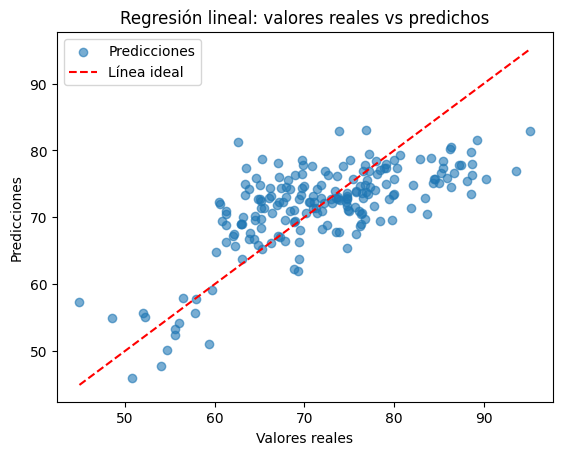

In [79]:
# Graficar valores reales vs predichos
plt.scatter(y_test, y_pred, label='Predicciones', alpha=0.6)

# Agregar linea de referencia y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val],[min_val, max_val], color='red', linestyle='--', label='Línea ideal')

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión lineal: valores reales vs predichos')
plt.legend()
plt.show()


### Comparación de distribuciones

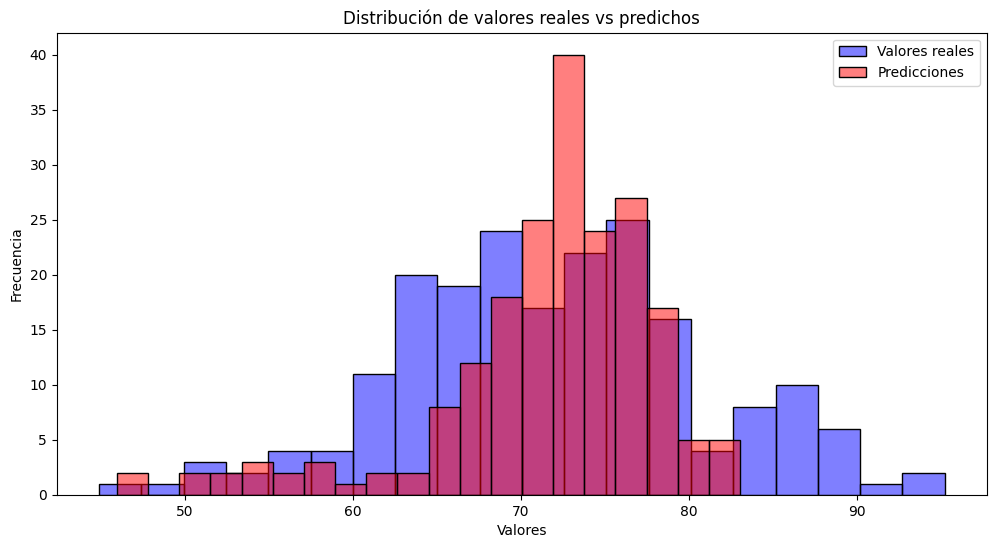

In [80]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12,6))

n_bins=20

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Predicciones')

plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predichos')
plt.legend()
plt.show()

# Residuos

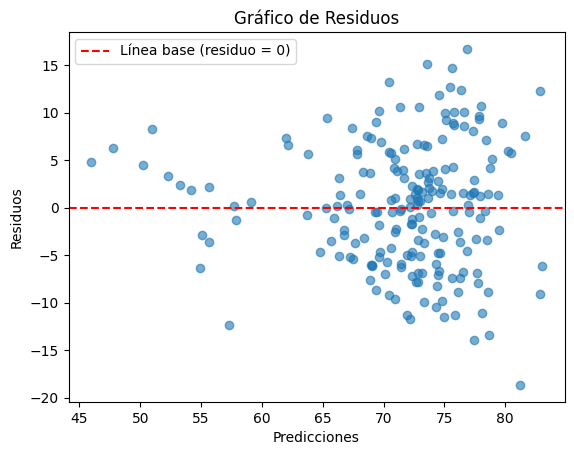

In [81]:
# Calculo de los residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Línea base (residuo = 0)')

plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()
plt.show()

C:\Users\apedraza\AppData\Local\Temp\ipykernel_12856\3294593649.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


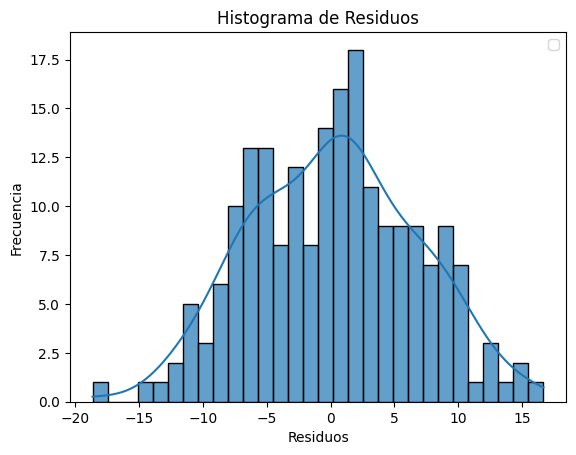

In [82]:
# Graficar histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.legend()
plt.show()

# Importancia de las Características

In [83]:
# Crear DF con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_})
coef_df = coef_df.sort_values(by= 'Coefficient', key=abs)

In [84]:
coef_df.sort_values(by= 'Coefficient', ascending= False, key=abs)

,Feature,Coefficient
7,aprobado,12.950520
0,horas_estudio_semanal,12.539344
1,nota_anterior,8.903964
2,tasa_asistencia,5.645970
5,nivel_dificultad,-1.962818
14,estilo_kinestésico,1.092511
6,tiene_tutor,0.894986
3,horas_sueno,-0.697237
12,estilo_auditivo,-0.537775
16,estilo_visual,-0.472256


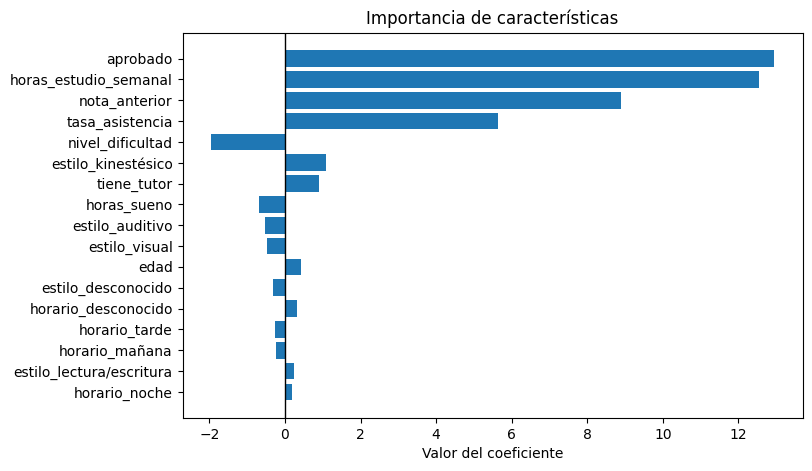

In [85]:
# Visualización los coeficientes con un gráfico de barras
plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Valor del coeficiente')
plt.title('Importancia de características')
plt.axvline(0, color='black', linewidth=1)
plt.show()

### Métricas

In [86]:
# Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

##### Cálculo de métricas

In [87]:
metrics = {
    'train': {
        'R2': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    },
    'test': {
        'R2': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    },

}

In [88]:
# Mostramos la métricas en un df
df_metrics = pd.DataFrame(metrics).T.round(2)
df_metrics

,R2,MAE,RMSE
train,0.54,5.26,6.57
test,0.48,5.26,6.49


In [89]:
# Método RandomForestRegressor
# Crear interacciones lineales (solo de grado 2, sin elevar a cuadrados)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Nombres de las nuevas columnas
col_names_poly = poly.get_feature_names_out(X.columns)

X_poly_df = pd.DataFrame(X_poly, columns=col_names_poly, index=X.index)


rf = RandomForestRegressor(
    n_estimators=300,       # más árboles
    max_depth=6,            # limitar profundidad
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

metrics = {
    'R2': (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)),
    'MAE': (mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)),
    'RMSE': (np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))
}

df_metrics_random = pd.DataFrame(metrics, index=['Train','Test']).round(2)
print(df_metrics_random)



         R2   MAE  RMSE
Train  0.66  4.42  5.64
Test   0.47  5.35  6.56


### Entrenamiento Final

In [92]:
# Entrenar el modelo con todo el conjunto de datos
modelo_final = LinearRegression()
modelo_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(modelo_final, '../models/modelo_regresion.pkl')

['../models/modelo_regresion.pkl']

In [91]:
# Definir modelos de regularizacion 
models ={
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Elastic': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Inicializar diccionario
metrics_results = {}

# Entrenar y evalucar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train) 

    # Predecir entrenamiento y prueba
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    # Calcular métricas
    metrics_results[name] = {
            'Train R2': r2_score(y_train, y_train_pred),
            'TrainMAE': mean_absolute_error(y_train, y_train_pred),
            'TrainRMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),

            'Test R2': r2_score(y_test, y_test_pred),
            'Test MAE': mean_absolute_error(y_test, y_test_pred),
            'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }

# Convertir las métricas en df
df_metrics_results = pd.DataFrame(metrics_results).T.round(2)
df_metrics_results

,Train R2,TrainMAE,TrainRMSE,Test R2,Test MAE,Test RMSE
Linear,0.54,5.26,6.57,0.48,5.26,6.49
Ridge,0.54,5.26,6.57,0.49,5.25,6.49
Lasso,0.53,5.29,6.62,0.49,5.26,6.45
Elastic,0.48,5.62,6.98,0.45,5.44,6.72
